In [1]:
from MOTLib.AnMOT import *

BN0 = 1027.9733527173166 MHz
BN0 = 1028.1630816970912 MHz
BN0 = 1026.9167015652324 MHz


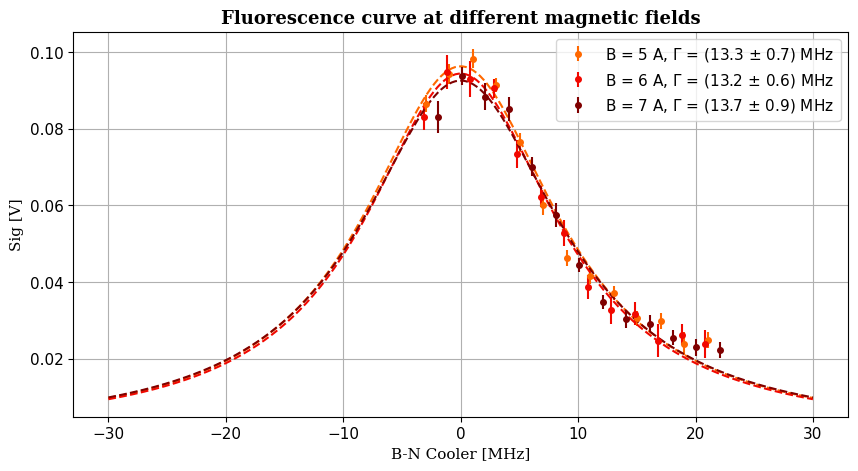

In [2]:
MagFields= [5, 6, 7]

Date = './2024-12-18'
color_palette = plt.cm.jet(np.linspace(0.8, 1, len(MagFields)))

_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title(f'Fluorescence curve at different magnetic fields', fontdict=title_font)
ax.set_xlabel(r'B-N Cooler [MHz]', fontdict=base_font)
ax.set_ylabel('Sig [V]', fontdict=base_font)
ax.grid()

x = np.linspace(-30, 30, 200)

for i,B in enumerate(MagFields):
  df_data = pd.read_csv(Date+'/Photoemission_Data_B='+str(B)+'.csv')
  df_params = pd.read_csv(Date+'/Lorentzian_params_B='+str(B)+'.csv')
  
  x_data = df_data['BN_cooler [MHz]']
  y_data = df_data['PhotoEm [V]']
  error = df_data['Error [V]']
            
  V0 = df_params['V0 [V]'][0]
  BN0 = df_params['BN0 [MHz]'][0]
  Gamma = df_params['Gamma [MHz]'][0]
  dGamma = df_params['dGamma [MHz]'][0]
  
  print(f'BN0 = {BN0} MHz')
  
  ax.plot(x, Lorentzian_in_MOT(x, V0, 0, Gamma), '--', color=color_palette[i])
  ax.errorbar(x_data - BN0, y_data, yerr=error, fmt='o', ms=4, color=color_palette[i], label='B = '+str(B)+' A,' + r' $\Gamma$ = '+ f'({Gamma:.1f} {pm} {dGamma:.1f}) MHz')

plt.legend()
plt.show()
    